In [1]:
# 내장 라이브러리
import glob
import pathlib

# 외부 라이브러리
import pandas as pd
import pandas.io.formats.format as pf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


pd.options.display.float_format = '{:0,.2f}'.format

plt.rcParams['font.family'] ='D2Coding'
plt.rcParams['axes.unicode_minus'] =False

DAY_OF_WEEK = ['월', '화', '수', '목', '금', '토', '일']
BASE_DIR = pathlib.Path('../').resolve()


# 데이터를 병합하여 하나의 데이터프레임 형성

files = glob.glob(str(BASE_DIR / '실습' / 'rawfiles' / 'CARD_SUBWAY_MONTH_*.csv'))

print('Files:\n'+'\n'.join(files)+'\n')

df_subway_raw = pd.concat([pd.read_csv(filename) for filename in files])
df_subway_raw.info()

Files:
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/실습/rawfiles/CARD_SUBWAY_MONTH_201903.csv
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/실습/rawfiles/CARD_SUBWAY_MONTH_201902.csv
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/실습/rawfiles/CARD_SUBWAY_MONTH_201901.csv
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/실습/rawfiles/CARD_SUBWAY_MONTH_201905.csv
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/실습/rawfiles/CARD_SUBWAY_MONTH_201904.csv
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/실습/rawfiles/CARD_SUBWAY_MONTH_201906.csv

<class 'pandas.core.frame.DataFrame'>
Index: 107028 entries, 0 to 17723
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null

In [2]:
df = df_subway_raw.copy()

df['사용일자'] = pd.to_datetime(df['사용일자'], format='%Y%m%d')
df['월'] = df['사용일자'].dt.month.astype(int)
df['승하차총승객수'] = df['승차총승객수'] + df['하차총승객수']

df_subway = df.copy()

np.random.seed(0)
df.sample(20)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,월,승하차총승객수
6234,2019-06-11,경춘선,퇴계원,"4,404.00","4,075.00",20190614,6,"8,479.00"
16251,2019-06-28,1호선,온양온천,"4,757.00","4,889.00",20190701,6,"9,646.00"
10344,2019-02-18,4호선,상록수,"20,839.00","20,546.00",20190221,2,"41,385.00"
3310,2019-02-06,경춘선,가평,"1,881.00","1,662.00",20190209,2,"3,543.00"
13946,2019-03-24,경춘선,대성리,"5,666.00",652.00,20190327,3,"6,318.00"
11715,2019-03-20,2호선,사당,"33,209.00","28,596.00",20190323,3,"61,805.00"
634,2019-05-02,2호선,신대방,"33,293.00","31,885.00",20190505,5,"65,178.00"
6530,2019-01-12,2호선,잠실새내,"22,579.00","24,271.00",20190115,1,"46,850.00"
2606,2019-02-05,분당선,서현,"6,991.00","7,644.00",20190208,2,"14,635.00"
2513,2019-03-05,경의선,효창공원앞,"8,689.00","8,629.00",20190308,3,"17,318.00"


In [3]:
def get_df(df: pd.DataFrame) -> pd.DataFrame:
    df['평균 승하차총승객수'] = df['승하차총승객수']
    df['합계 승하차총승객수'] = df['승하차총승객수']
    return df \
        .groupby(['월']) \
        .aggregate({
            '합계 승하차총승객수': np.sum,
            '평균 승하차총승객수': np.mean,
        }) \
        .reset_index()

get_df(df_subway)

/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_81592/2729755225.py:6: FutureWarning: The provided callable <function sum at 0x107e4afc0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .aggregate({
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_81592/2729755225.py:6: FutureWarning: The provided callable <function mean at 0x107e50400> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .aggregate({


,월,합계 승하차총승객수,평균 승하차총승객수
0,1,"442,746,389.00","24,148.92"
1,2,"379,836,010.00","22,960.53"
2,3,"466,692,826.00","25,443.94"
3,4,"470,934,348.00","26,533.01"
4,5,"485,718,557.00","26,489.89"
5,6,"442,210,635.00","24,949.82"


/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_81592/2729755225.py:6: FutureWarning: The provided callable <function sum at 0x107e4afc0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .aggregate({
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_81592/2729755225.py:6: FutureWarning: The provided callable <function mean at 0x107e50400> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .aggregate({


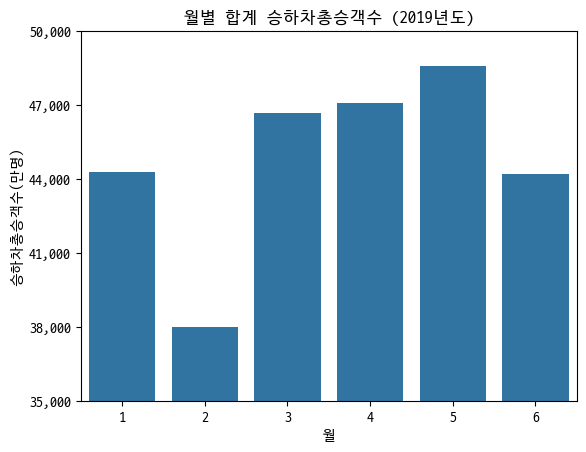

In [4]:
def display_sum():
    sns.barplot(data=get_df(df_subway), x='월', y='합계 승하차총승객수')

    ylim = 3.5e8, 5e8
    yticks = np.linspace(*ylim, 6)

    plt.title('월별 합계 승하차총승객수 (2019년도)')
    plt.ylabel('승하차총승객수(만명)')
    plt.ylim(*ylim)
    plt.yticks(yticks, [f'{int(y/10000):,}' for y in yticks])

display_sum()
plt.show()

/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_81592/2729755225.py:6: FutureWarning: The provided callable <function sum at 0x107e4afc0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .aggregate({
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_81592/2729755225.py:6: FutureWarning: The provided callable <function mean at 0x107e50400> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .aggregate({


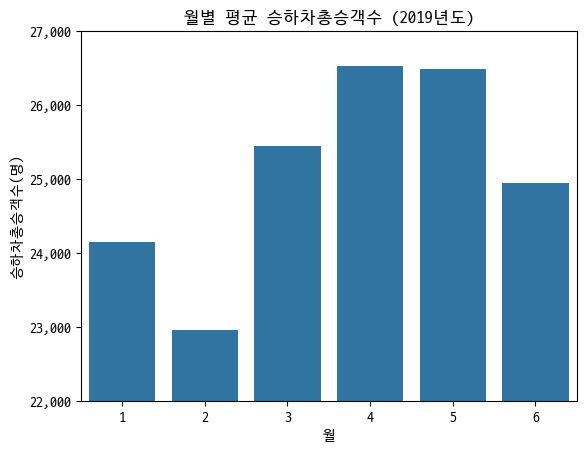

In [5]:
def display_mean():
    sns.barplot(data=get_df(df_subway), x='월', y='평균 승하차총승객수')

    ylim = 22000, 27000
    yticks = np.linspace(*ylim, 6)

    plt.title('월별 평균 승하차총승객수 (2019년도)')
    plt.ylabel('승하차총승객수(명)')
    plt.ylim(*ylim)
    plt.yticks(yticks, [f'{int(y):,}' for y in yticks])

display_mean()
plt.show()

/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_81592/2729755225.py:6: FutureWarning: The provided callable <function sum at 0x107e4afc0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .aggregate({
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_81592/2729755225.py:6: FutureWarning: The provided callable <function mean at 0x107e50400> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .aggregate({
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_81592/2729755225.py:6: FutureWarning: The provided callable <function sum at 0x107e4afc0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .aggrega

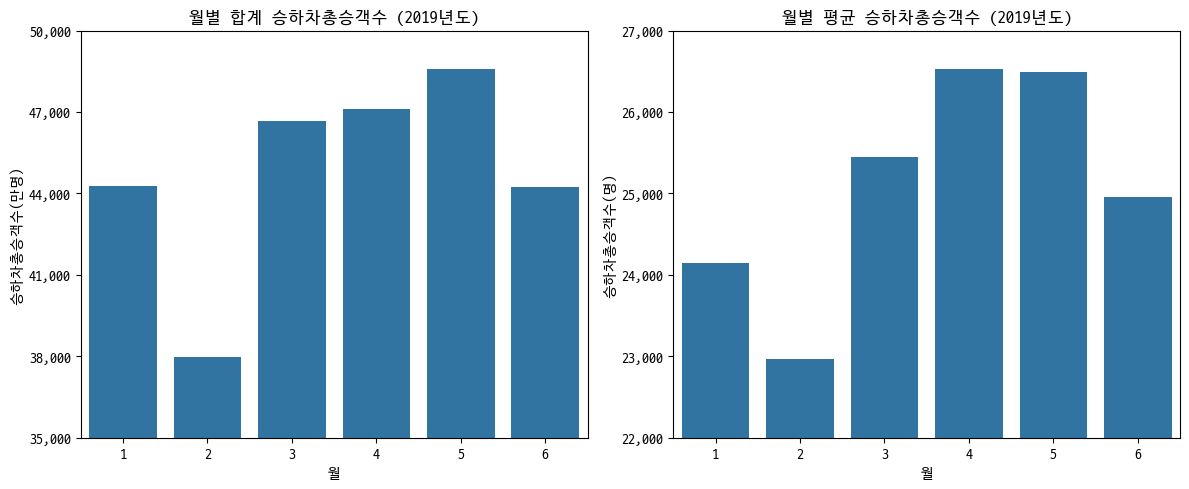

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
display_sum()

plt.subplot(1, 2, 2)
display_mean()

plt.tight_layout()